In [1]:
from utils import *

In [26]:
JOBPATH = "/tiger/u/lando/cmeta/v0.1/532887/log.json"
MAXRFORVEL = -4.

In [19]:
jobpathdash = JOBPATH.replace("/", "-")
localpath = f"/tmp/{jobpathdash}"

import os
os.system(f"scp lando@sc.stanford.edu:{JOBPATH} {localpath}")
lines = read_log(localpath)
print(f"Found {len(lines)} lines")
print(f"File at {localpath}")

Found 60441 lines
File at /tmp/-tiger-u-lando-cmeta-v0.1-532887-log.json


In [14]:
warmup, slbo = extract_rewards(lines)
print(f"Found {len(warmup)} Warmups")
print(f"Found {len(slbo)} Tasks")
print(f"First task has {len(slbo[0])} Stages")
real_warm, virt_warm = get_warmup(lines)

Found 1 Warmups
Found 1 Tasks
First task has 69 Stages


Text(0.5, 1.0, 'v0.1 Warmup 80 Iters of SLBO')

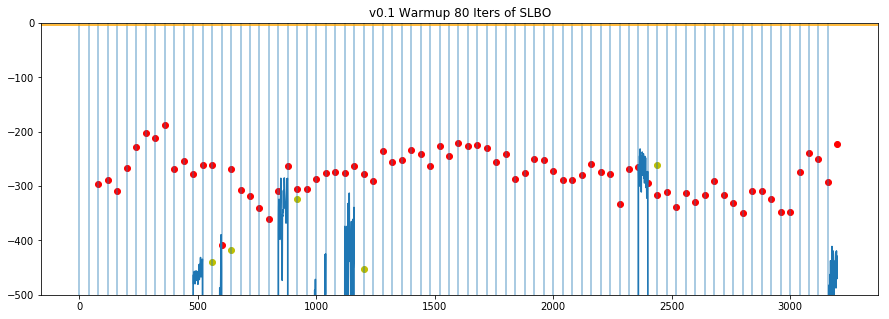

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_stage(ax, warmup[0], 80, 40, ylim=(-500, 0))
ax.scatter([(i+1)*40 for i in range(1, 80)], real_warm, color="r")
ax.scatter([(i+1)*40 for i in range(1, 80)], virt_warm, color="y")
ax.axhline(y=MAXRFORVEL, color="orange")
plt.title("v0.1 Warmup 80 Iters of SLBO")

Text(0.5, 1.0, 'REAL REWARDS OVER COURSE OF WARMUP')

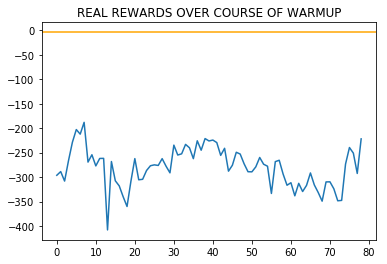

In [35]:
plt.plot(real_warm)
plt.axhline(y=MAXRFORVEL, color="orange")
plt.title("REAL REWARDS OVER COURSE OF WARMUP")

Text(0.5, 1.0, 'VIRT REWARDS OVER COURSE OF WARMUP')

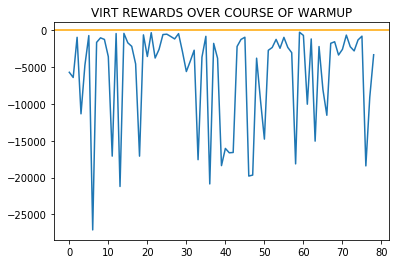

In [36]:
plt.plot(virt_warm)
plt.axhline(y=MAXRFORVEL, color="orange")
plt.title("VIRT REWARDS OVER COURSE OF WARMUP")